<a href="https://colab.research.google.com/github/vasugupta9/DeepLearningProjects/blob/main/CIFAR10_Image_Classifier/Cifar10_ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [2]:
# Loading the cifar-10 dataset 
# cifar10 is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(np.min(x_train), np.max(x_train)) # to check if scaling to the range 0-1 is needed
print(np.min(y_train), np.max(y_train))

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
0 255
0 9


In [3]:
# scaling x_train and x_test values to the range 0-1
x_train_scaled = x_train/255.
x_test_scaled  = x_test/255.
# y_train, y_test values are already labelled as integers from 0 to 9 , so no preprocessing required

In [4]:
# Defining the CNN architecture using keras Sequential API
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

# printing model summary
model.summary()

# Compiling the model 
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                655370    
Total params: 657,162
Trainable params: 657,162
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Training the model 
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
1563/1563 - 8s - loss: 12.0093 - accuracy: 0.3393 - val_loss: 1.8081 - val_accuracy: 0.3804
Epoch 2/50
1563/1563 - 8s - loss: 1.6351 - accuracy: 0.4400 - val_loss: 1.7861 - val_accuracy: 0.4023
Epoch 3/50
1563/1563 - 8s - loss: 1.4936 - accuracy: 0.4915 - val_loss: 2.0170 - val_accuracy: 0.3752
Epoch 4/50
1563/1563 - 8s - loss: 1.4132 - accuracy: 0.5191 - val_loss: 2.1124 - val_accuracy: 0.3759
Epoch 5/50
1563/1563 - 8s - loss: 1.3558 - accuracy: 0.5392 - val_loss: 2.5874 - val_accuracy: 0.3663
Epoch 6/50
1563/1563 - 8s - loss: 1.3224 - accuracy: 0.5498 - val_loss: 2.5037 - val_accuracy: 0.3621
Epoch 7/50
1563/1563 - 8s - loss: 1.2705 - accuracy: 0.5671 - val_loss: 2.9133 - val_accuracy: 0.3172
Epoch 8/50
1563/1563 - 8s - loss: 1.2145 - accuracy: 0.5874 - val_loss: 3.1044 - val_accuracy: 0.3588
Epoch 9/50
1563/1563 - 9s - loss: 1.1560 - accuracy: 0.6068 - val_loss: 3.6355 - val_accuracy: 0.3576
Epoch 10/50
1563/1563 - 8s - loss: 1.0775 - accuracy: 0.6319 - val_loss: 3.8478 -

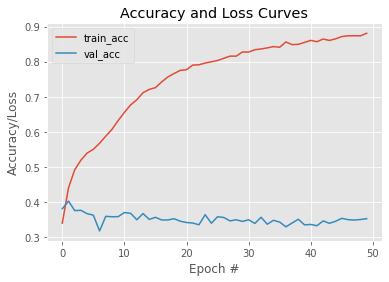

In [8]:
# plotting loss and accuracy values 
num_epochs=50
plt.style.use('ggplot')
plt.figure()
#plt.plot(np.arange(num_epochs), history.history["loss"], label="train_loss")
#plt.plot(np.arange(num_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(num_epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(num_epochs), history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy and Loss Curves")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy/Loss")
plt.legend()
plt.show()


## Observations 
1. Lower validation accuracy of 35% compared to training accuracy of 88% indicates overfitting by this simple CNN model. Techniques including regularisation , batch normalization, data augmentation, etc can help reduce overfitting
